In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.gridspec as gridspec

In [12]:
data = pd.read_csv('predictive_maintenance.csv')

In [13]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [14]:
data.shape

(10000, 10)

In [15]:
data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [16]:
data = data.drop('UDI', axis=1)

In [17]:
data = data.drop('Failure Type', axis=1)

In [18]:
data.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M14860,M,298.1,308.6,1551,42.8,0,0
1,L47181,L,298.2,308.7,1408,46.3,3,0
2,L47182,L,298.1,308.5,1498,49.4,5,0
3,L47183,L,298.2,308.6,1433,39.5,7,0
4,L47184,L,298.2,308.7,1408,40.0,9,0


In [19]:
correlation = data.corr()

<AxesSubplot:>

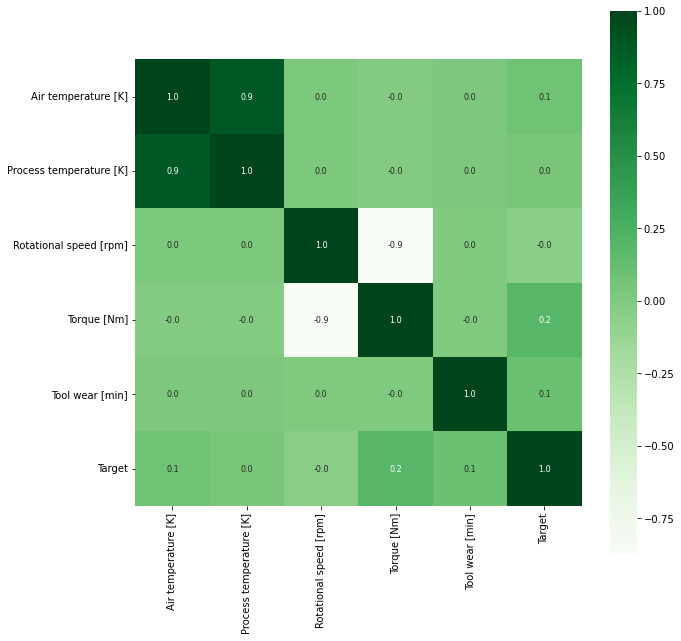

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Greens')

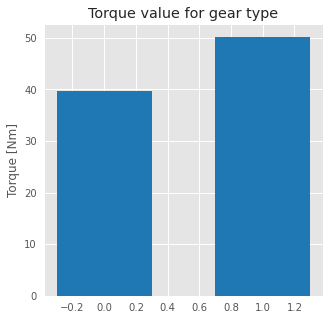

In [21]:
with plt.style.context(("seaborn","ggplot")):
    torque_plt = data.groupby(by="Target").mean()[["Torque [Nm]"]]

    plt.figure(figsize=(5,5))
    plt.bar(torque_plt.index,
            torque_plt["Torque [Nm]"],
            color="tab:blue",
            width=0.6)
    plt.ylabel("Torque [Nm]")
    plt.title("Torque value for gear type")

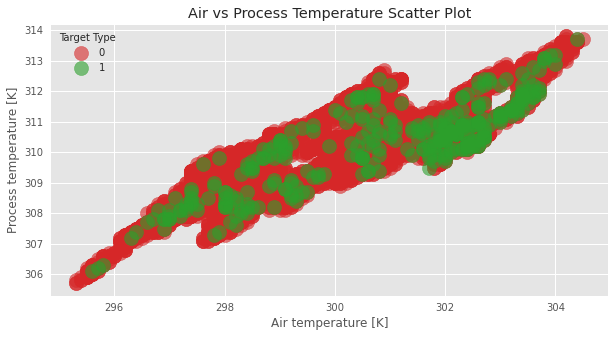

In [22]:
with plt.style.context(("seaborn","ggplot")):
    color = {0 : "tab:red", 1:"tab:green"}
    plt.figure(figsize=(10,5))
    for target_typ in data["Target"].unique():
        plt.scatter(data[data["Target"]==target_typ]["Air temperature [K]"],
                    data[data["Target"]==target_typ]["Process temperature [K]"],
                    c=color[target_typ],
                    s=200,
                    alpha=0.6,
                    label=target_typ)
    plt.xlabel("Air temperature [K]")
    plt.ylabel("Process temperature [K]")
    plt.title("Air vs Process Temperature Scatter Plot")
    plt.legend(title="Target Type",loc="best")

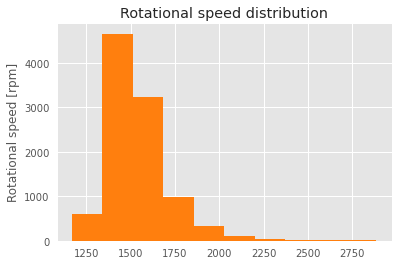

In [39]:
with plt.style.context(("seaborn","ggplot")):
    plt.figure(figsize=(6,4))
    plt.hist(data["Rotational speed [rpm]"], color="tab:orange")
    plt.ylabel("Rotational speed [rpm]")
    plt.title("Rotational speed distribution")

In [40]:
def create_figure(plot1_f1,plot1_f2, plot2_f,plot3_f3):
    with plt.style.context(("seaborn","ggplot")):
        fig = plt.figure(constrained_layout=True, figsize=(10,8))
        specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig) ## Declaring 2x2 figure.

        ax1 = fig.add_subplot(specs[0, :]) ## First Row
        ax2 = fig.add_subplot(specs[1, 0]) ## Second Row First Column
        ax3 = fig.add_subplot(specs[1, 1]) ## Second Row Second Colums

        ## First Graph -  Scatter Plot
        color = {0 : "tab:red", 1:"tab:green"}
        for target_typ in data["Target"].unique():
            ax1.scatter(data[data["Target"]==target_typ][plot1_f1],
                        data[data["Target"]==target_typ][plot1_f2],
                        c=color[target_typ],
                        s=200,
                        alpha=0.6,
                        label=target_typ)
        ax1.set_xlabel(plot1_f1)
        ax1.set_ylabel(plot1_f2)
        ax1.set_title("%s vs %s Scatter Plot"%(plot1_f1, plot1_f2))
        ax1.legend(title="Target Type",loc="best")

        ## Second Graph - Bar Chart
        torque_plt = data.groupby(by="Target").mean()[[plot2_f]]
        ax2.bar(torque_plt.index,
                torque_plt[plot2_f],
                color="tab:blue",
                width=0.6)
        ax2.set_ylabel(plot2_f)
        ax2.set_title("%s value for gear type"%(plot2_f))

        ## Third Graph - Histogram
        ax3.hist(data[plot3_f3], color="tab:orange")
        ax3.set_ylabel(plot3_f3)
        ax3.set_title("%s distribution"%(plot3_f3))

        plt.close(fig)
        return fig

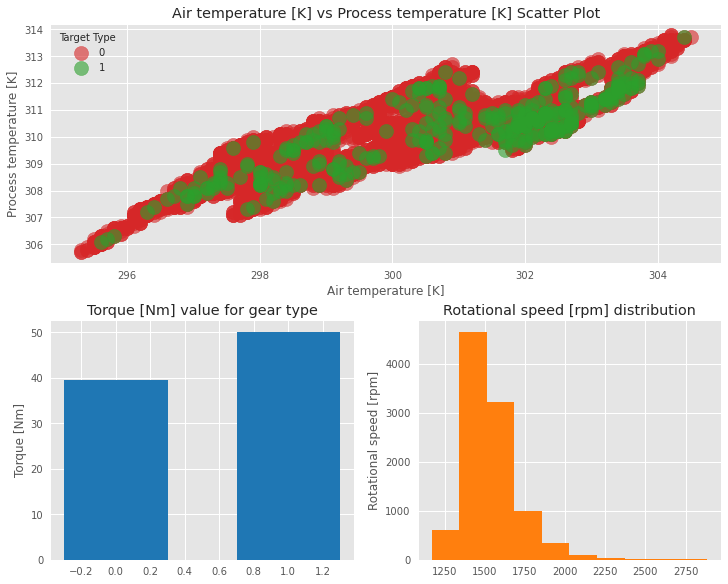

In [42]:
create_figure("Air temperature [K]","Process temperature [K]","Torque [Nm]", "Rotational speed [rpm]")

Column
    [0] Column
        [0] TextInput(name='plot1_f1', value='Air temperature [K]')
        [1] TextInput(name='plot1_f2', value='Process temperature [K]')
        [2] TextInput(name='plot2_f', value='Torque [Nm]')
        [3] TextInput(name='plot3_f3', value='Rotational speed [rpm]')
    [1] Row
        [0] Matplotlib(Figure, name='interactive00152')
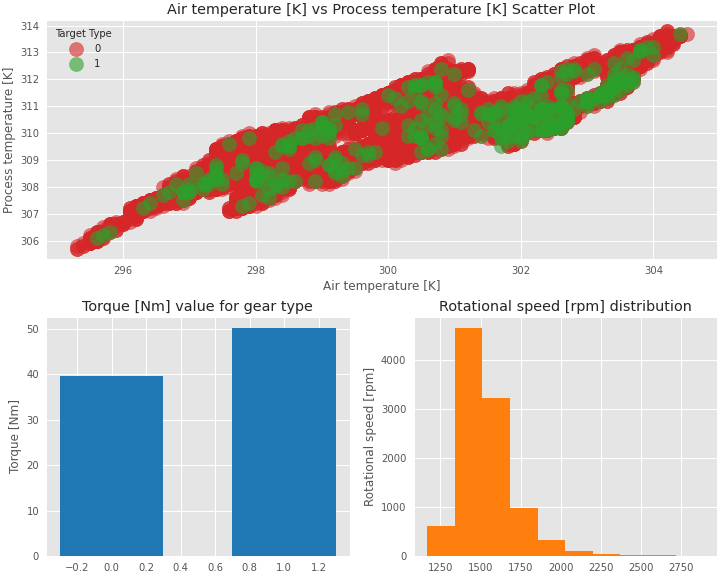

In [44]:
import panel as pn
pn.extension()

kw = dict(plot1_f1= "Air temperature [K]",
          plot1_f2= "Process temperature [K]",
          plot2_f= "Torque [Nm]",
         plot3_f3="Rotational speed [rpm]")
dash1 = pn.interact(create_figure, **kw)
dash1

Column
    [0] Column
        [0] TextInput(name='plot1_f1', value='Air temperature [K]')
        [1] TextInput(name='plot1_f2', value='Process temperature [K]')
        [2] TextInput(name='plot2_f', value='Torque [Nm]')
        [3] TextInput(name='plot3_f3', value='Rotational speed [rpm]')
    [1] Row
        [0] Matplotlib(Figure, name='interactive00152')
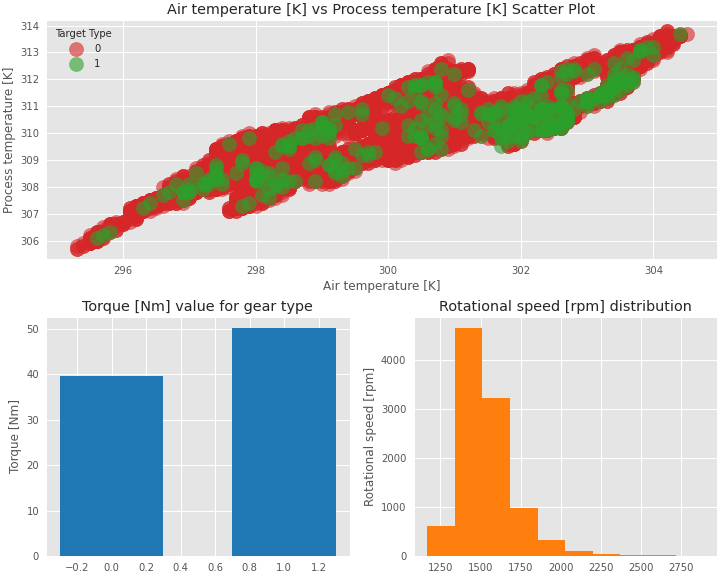

In [45]:
dash1

In [46]:
dash1[0]

Column
    [0] TextInput(name='plot1_f1', value='Air temperature [K]')
    [1] TextInput(name='plot1_f2', value='Process temperature [K]')
    [2] TextInput(name='plot2_f', value='Torque [Nm]')
    [3] TextInput(name='plot3_f3', value='Rotational speed [rpm]')

Row
    [0] Matplotlib(Figure, name='interactive00152')
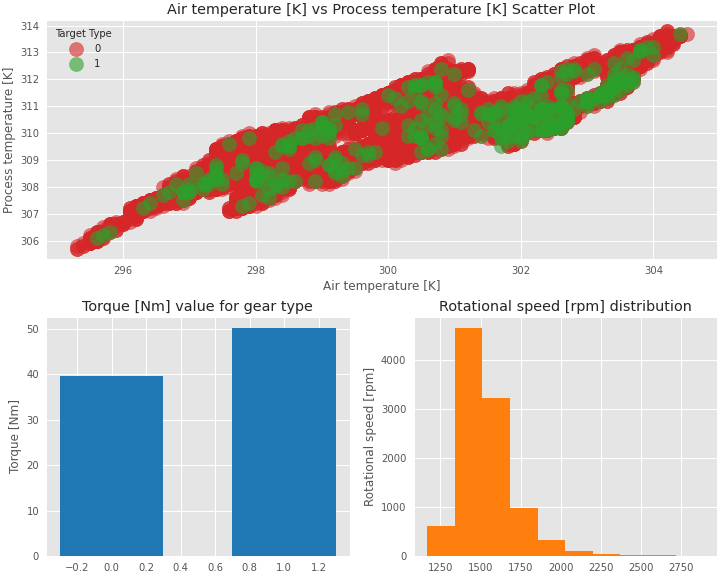

In [47]:
dash1[1]

Column
    [0] Row(align='center')
        [0] TextInput(name='plot1_f1', value='Air temperature [K]')
        [1] TextInput(name='plot1_f2', value='Process temperature [K]')
    [1] Row(align='center')
        [0] TextInput(name='plot2_f', value='Torque [Nm]')
        [1] TextInput(name='plot3_f3', value='Rotational speed [rpm]')
    [2] Row
        [0] Matplotlib(Figure, name='interactive00152')
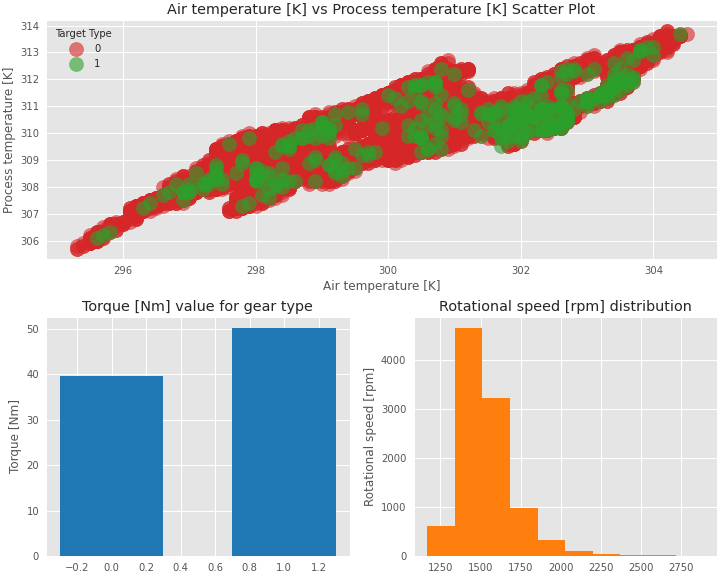

In [50]:
dash2 = pn.Column(
                    pn.Row(dash1[0][0],dash1[0][1], align="center"),
                    pn.Row(dash1[0][2],dash1[0][3], align="center"),
                    dash1[1]
                 )
dash2

In [31]:
import panel.widgets as pnw

In [86]:
f1 = pnw.Select(options=["Air temperature [K]","Process temperature [K]","Torque [Nm]", "Rotational speed [rpm]"], name="Scatter Plot Feature 1")
f2 = pnw.Select(options=["Air temperature [K]","Process temperature [K]","Torque [Nm]", "Rotational speed [rpm]"], name="Scatter Plot Feature 2")
f3 = pnw.Select(options=["Air temperature [K]","Process temperature [K]","Torque [Nm]", "Rotational speed [rpm]"], name="Bar plot Feature 1")
f4 = pnw.Select(options=["Air temperature [K]","Process temperature [K]","Torque [Nm]", "Rotational speed [rpm]"], name="Histogram Plot Feature 1")

In [87]:
@pn.depends(f1.param.value,f2.param.value,f3.param.value,f4.param.value)
def create_dash(f1,f2,f3,f4):
    return create_figure(f1,f2,f3,f4)

In [88]:
heading = "Gear Box Mechanism Data Analysis Dashboard"
text = pnw.StaticText(value=heading, align="center")

Column
    [0] StaticText(align='center', value='<h3>Gear Mechanisms D...)
    [1] Row(align='center')
        [0] Select(name='Scatter Plot Feature 1', options=['Air temperature [K]', ...], value='Air temperature [K]')
        [1] Select(name='Scatter Plot Feature 2', options=['Air temperature [K]', ...], value='Air temperature [K]')
    [2] Row(align='center')
        [0] Select(name='Bar plot Feature 1', options=['Air temperature [K]', ...], value='Air temperature [K]')
        [1] Select(name='Histogram Plot F..., options=['Air temperature [K]', ...], value='Air temperature [K]')
    [3] Row
        [0] ParamFunction(function)
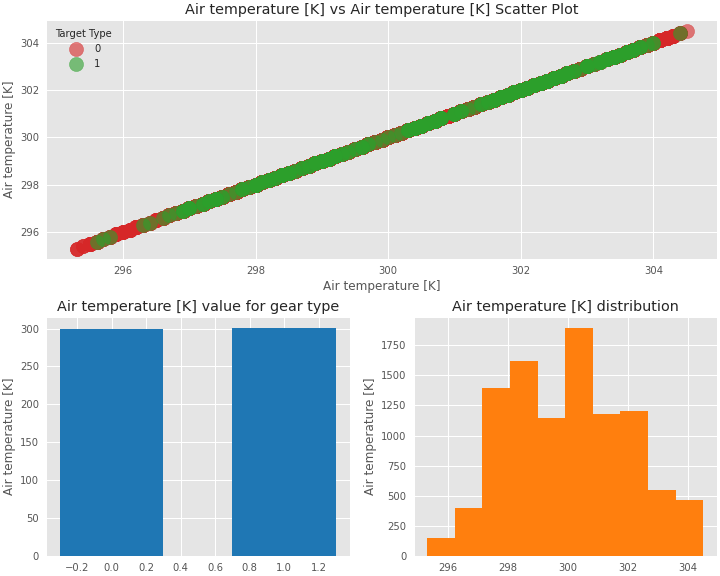

In [93]:
heading = "<h3>Gear Mechanisms Data Analysis Dashboard</h3>\nPlease feel free to try various combinations of parameters to analyze results from different angles"
text = pnw.StaticText(value=heading, align="center")

dash3 = pn.Column(
                    text,
                    pn.Row(f1,f2, align="center"),
                    pn.Row(f3,f4, align="center"),
                    pn.Row(create_dash)
                )
dash3

In [94]:
dash3.show()

Launching server at http://localhost:51709


Column
    [0] StaticText(align='center', value='<h3>Gear Mechanisms D...)
    [1] Row(align='center')
        [0] Select(name='Scatter Plot Feature 1', options=['Air temperature [K]', ...], value='Air temperature [K]')
        [1] Select(name='Scatter Plot Feature 2', options=['Air temperature [K]', ...], value='Process temperature [K]')
    [2] Row(align='center')
        [0] Select(name='Bar plot Feature 1', options=['Air temperature [K]', ...], value='Rotational speed [rpm]')
        [1] Select(name='Histogram Plot F..., options=['Air temperature [K]', ...], value='Process temperature [K]')
    [3] Row
        [0] ParamFunction(function)
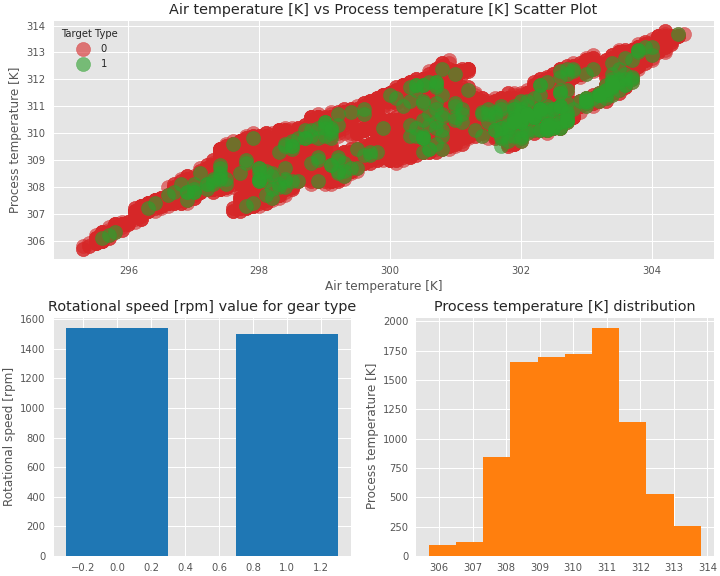

In [95]:
dash3.servable()

In [96]:
dash3.save("dash.html")